# 문제1

이 자료를 활용하여 연령대를 `10대`, `20대`, `30대`, `40대`, `50대`로 구분하고 각 연령대별로 어느 정도의 비율을 차지하는지 시각화고 결과를 해석하시오.

In [1]:
# 패키지 참조
import sys
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import numpy as np
from pandas import Series

In [2]:
# 데이터 불러오기
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/04.데이터시각화/수업/수업데이터/poll.xlsx')
origin

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70
5,남자,기혼,21,대학원,80
6,여자,미혼,39,대학교,190
7,남자,기혼,32,대학교,100
8,남자,미혼,44,초등학교,120
9,남자,미혼,55,대학교,110


In [3]:
# 그래프 초기화

plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 데이터 전처리

# a2 = origin.query('나이 >= 20 and 나이 <30')
# a20 = list(a2['나이'])
# a20
# a3 = origin.query('나이 >= 30 and 나이 <40')
# a30 = list(a3['나이'])
# a4 = origin.query('나이 >= 40 and 나이 <50')
# a40 = list(a4['나이'])
# a5 = origin.query('나이 >= 50 and 나이 <60')
# a50 = list(a5['나이'])

# age=[]
# age.append(a20)
# age 


In [5]:
#진규 method

agetype = (origin['나이']//10*10).astype('str')+'대'
ageRatio = agetype.value_counts()
ageRatio

나이
20대    17
30대    10
40대     8
50대     5
Name: count, dtype: int64

In [6]:
# agetype = list((origin['나이']//10*10))
# #agetype
# ageRatio = agetype.value_counts()
# ageRatio
# agetypelabel = list((origin['나이']//10*10).astype('str')+'대')
# # agetypelabel

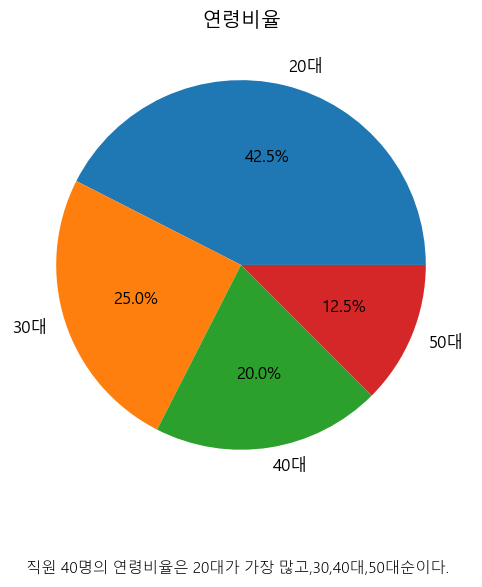

In [110]:
plt.figure()
plt.title('연령비율')
plt.pie(ageRatio.values,labels=ageRatio.index,autopct = '%0.1f%%')
txt = "직원 40명의 연령비율은 20대가 가장 많고,30,40대,50대순이다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.savefig('1번',dpi=300)
plt.show()
plt.close()

# 문제2

위 `문제1`의 데이터를 활용하여 월수입 100만원 미만인 경우 `저소득`, 100만원 이상 250만원 미만인 경우 `보통`, 250만원 이상인 경우 `고소득`으로 구분하여 각각 어느 정도의 비율을 차지하는지 시각화 하고 결과를 해석하시오.

In [40]:
# 1. loc 활용한 조건식 

# df3 = origin.copy()
# df3.loc[df3['월수입']<100,'월수입'] ='저소득'

# 2. query 활용해서 다 뽑아서 리스트 만들어서 합침

df = origin.copy()
lowearn = df.query('월수입 < 100')
lowearn['월수입'] = '저소득'
low = list(lowearn['월수입'])
#print(low)

middleearn = df.query('월수입 >= 100 and 월수입 < 250')
middleearn['월수입'] = '보통'
middle = list(middleearn['월수입'])
#print(middle)

highearn = origin.query('월수입 >= 250')
highearn['월수입'] = '고소득'
high = list(highearn['월수입'])
#print(high)

earn = low+middle+high
#print(earn)
earnType = Series(earn)
eType = earnType.value_counts()
eType

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_11888\1069386015.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowearn['월수입'] = '저소득'
C:\Users\Jihwan\AppData\Local\Temp\ipykernel_11888\1069386015.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middleearn['월수입'] = '보통'
C:\Users\Jihwan\AppData\Local\Temp\ipykernel_11888\1069386015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

보통     22
저소득    15
고소득     3
Name: count, dtype: int64

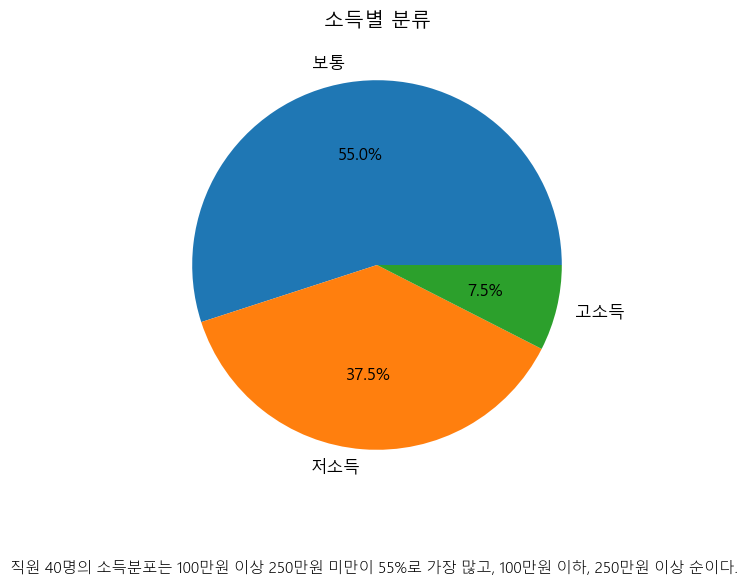

In [95]:
plt.figure()
plt.title('소득별 분류')
plt.pie(eType.values,labels=eType.index,autopct = '%0.1f%%')
txt = "직원 40명의 소득분포는 100만원 이상 250만원 미만이 55%로 가장 많고, 100만원 이하, 250만원 이상 순이다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

# 문제3

위 `문제1`의 데이터를 활용하여 나이와 월수입의 관계를 알아보고자 한다. 시각화 결과를 통해 나이와 월수입의 관계를 해석하고 `20,25,30,35,40,45,50`세의 예상 월 수입을 표시하는 BarPlot을 제시하고 결과를 해석하시오.

In [47]:
df2 = origin.copy()
df3 = df2.sort_values('나이')
df3

,성별,결혼상태,나이,최종학력,월수입
11,남자,기혼,20,대학교,50
0,남자,기혼,21,대학교,60
38,남자,기혼,21,대학원,80
5,남자,기혼,21,대학원,80
14,여자,기혼,21,대학원,80
1,남자,기혼,22,대학원,100
25,남자,미혼,22,고등학교,60
15,여자,기혼,22,대학원,70
39,남자,미혼,23,대학교,100
34,여자,기혼,24,고등학교,50


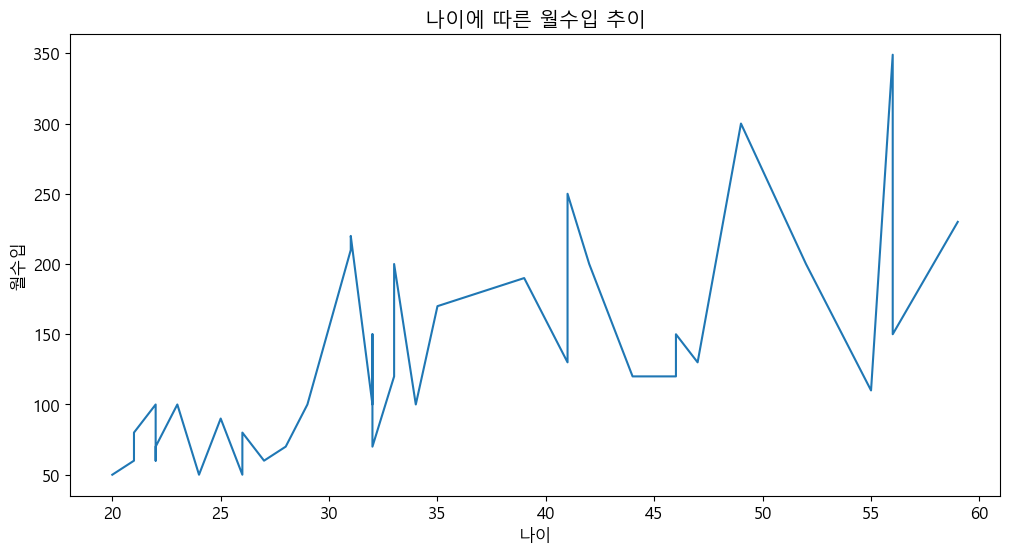

In [48]:
plt.figure()
plt.title('나이에 따른 월수입 추이')
plt.plot(df3['나이'],df3['월수입'])
plt.xlabel('나이')
plt.ylabel('월수입')
plt.show()
plt.close()


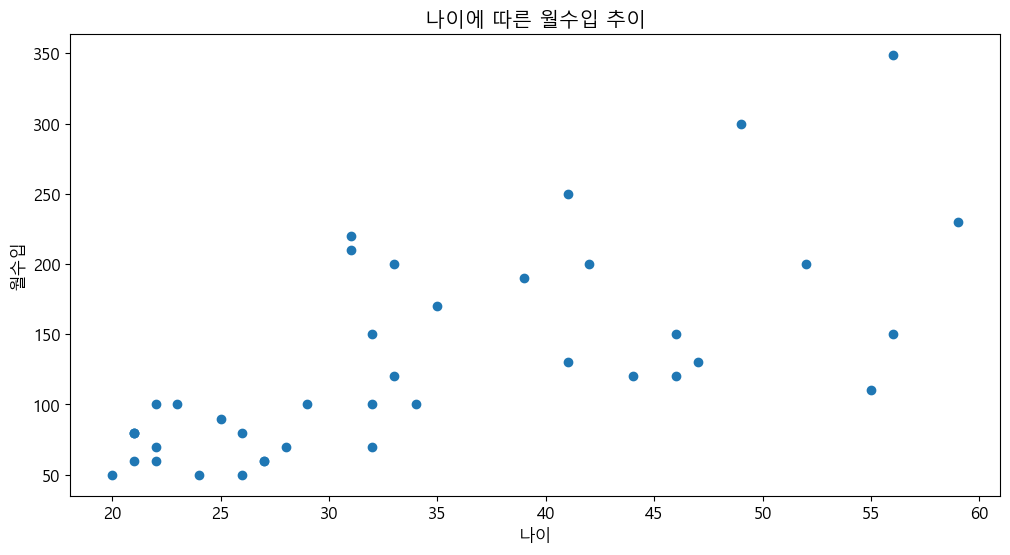

In [49]:
plt.figure()
plt.title('나이에 따른 월수입 추이')
plt.scatter(df3['나이'],df3['월수입'])
plt.xlabel('나이')
plt.ylabel('월수입')
plt.show()
plt.close()

In [97]:
z = np.polyfit(df3['나이'],df3['월수입'],1)
f = np.poly1d(z)


In [98]:
x = 30
f(x)

111.98855708836712

In [99]:
x = [20,25,30,35,40,45,50]
y = f(x)
y

array([ 69.3302111 ,  90.65938409, 111.98855709, 133.31773008,
       154.64690308, 175.97607608, 197.30524907])

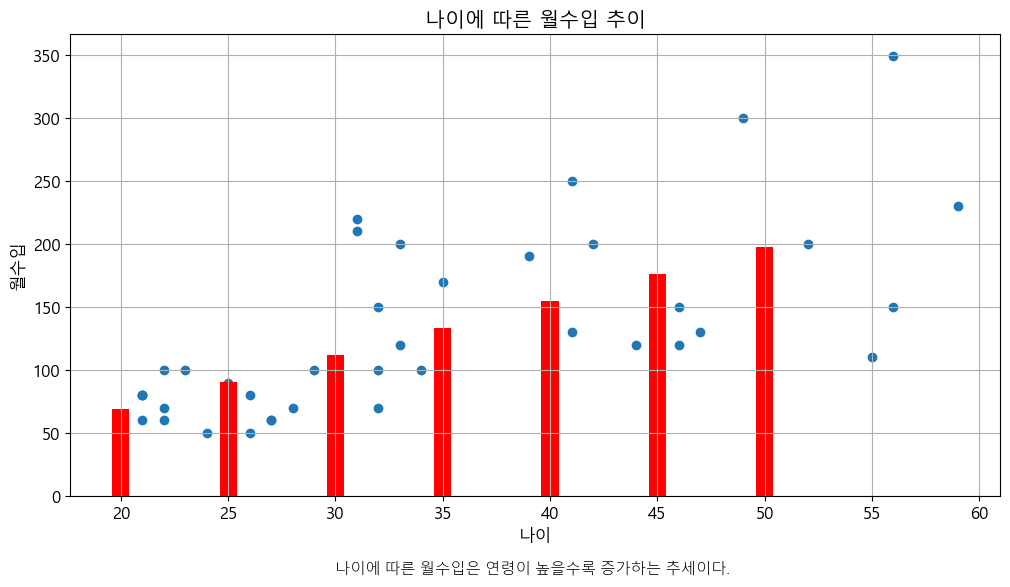

In [100]:
plt.figure()
plt.scatter(df3['나이'], df3['월수입'])
plt.bar(x, y, color="#ff0000")
plt.title("나이에 따른 월수입 추이")
plt.xlabel("나이")
plt.ylabel("월수입")
plt.grid()
txt = "나이에 따른 월수입은 연령이 높을수록 증가하는 추세이다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

# 문제4

2015년과 2016년에 대한 평균치를 활용하여 종사자 규모별 업장 수가 전체 대비 어느 정도의 비율을 차지하는지 시각화 하고 결과를 해석하시오.

In [66]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/04.데이터시각화/수업/연구과제데이터/jobs_by_scale.xlsx',index_col='종사자규모별')
origin

,2015,2016
종사자규모별,,
1~4명,553.5,576.7
5~9명,211.6,216.8
10~29명,194.7,195.5
30~49명,227.4,227.4
50~99명,152.8,155.7
100~199명,221.9,220.6
200~299명,80.9,81.0
300~999명,100.5,99.3
1000명 이상,557.6,549.7


In [70]:
# 일반적인 pie차트의 데이터 빈도수로 비율을 구하는 것이 아닌 각 데이터의 전체에 대한 비율%를 나타내야 함
a = origin[2015]
a
b = origin[2016]



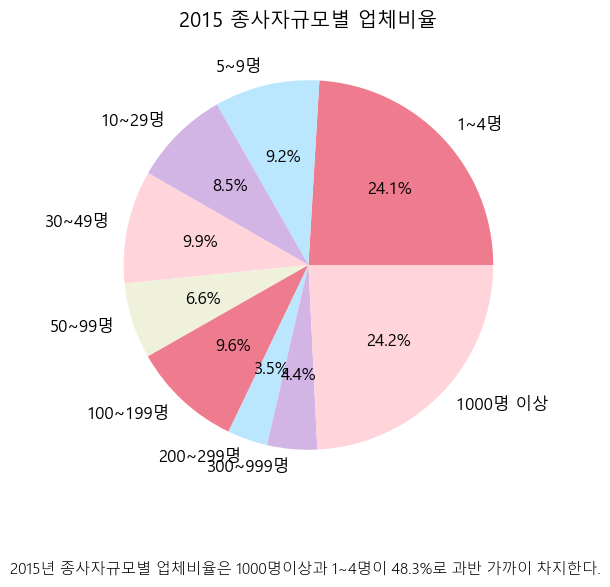

In [101]:
plt.figure()
plt.title("2015 종사자규모별 업체비율")
plt.pie(a.values, labels=a.index, autopct='%0.1f%%',
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
       )
txt = "2015년 종사자규모별 업체비율은 1000명이상과 1~4명이 48.3%로 과반 가까이 차지한다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

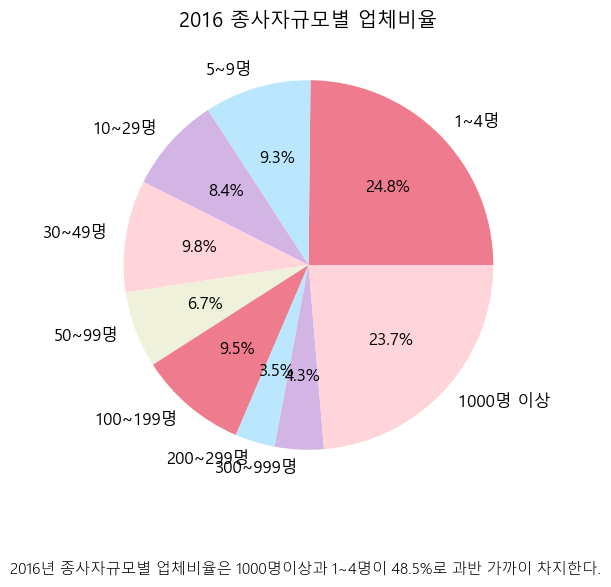

In [102]:
plt.figure()
plt.title("2016 종사자규모별 업체비율")
plt.pie(b.values, labels=a.index, autopct='%0.1f%%',
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB'],
       )
txt = "2016년 종사자규모별 업체비율은 1000명이상과 1~4명이 48.5%로 과반 가까이 차지한다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

# 문제5

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하고 결과를 해석하시오.

In [76]:
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/04.데이터시각화/수업/연구과제데이터/traffic_acc.xlsx')
origin

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


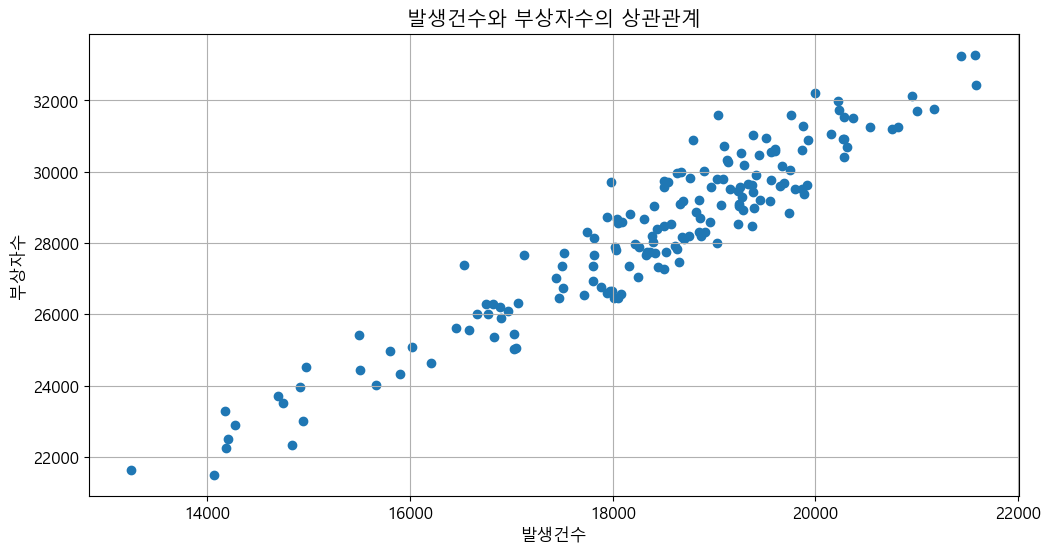

In [85]:
plt.figure()
plt.scatter(origin['발생건수'], origin['부상자수'])
plt.title("발생건수와 부상자수의 상관관계")
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()

In [103]:
z = np.polyfit(origin['발생건수'],origin['부상자수'],1)

z[1]

2495.338546755988

In [106]:
f =np.poly1d(z)
x = 15000
f(x)
x = origin['발생건수']
y = f(x)
y

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      

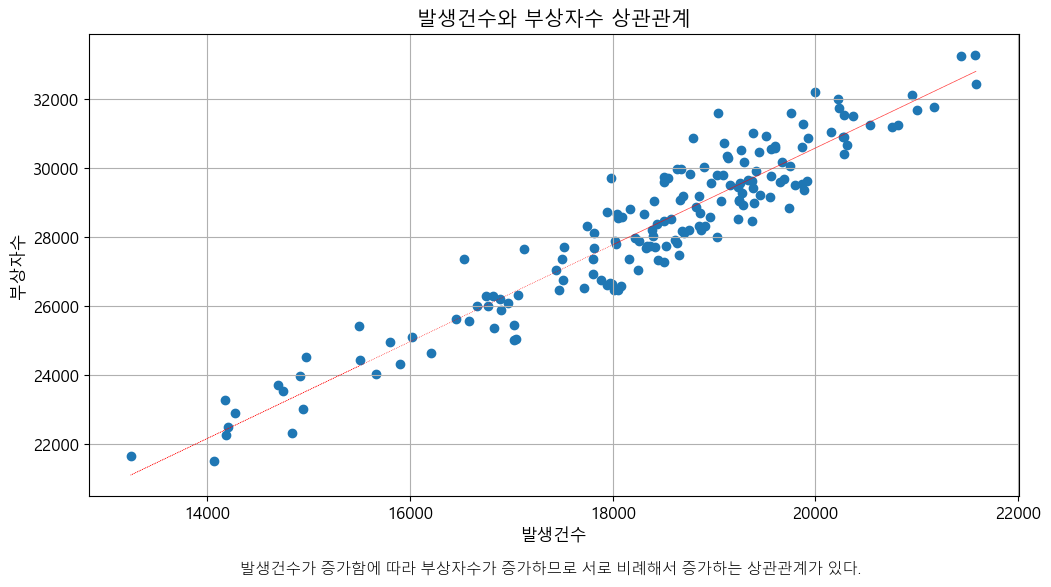

In [108]:
plt.figure()
plt.scatter(origin['발생건수'], origin['부상자수'])
plt.plot(x, y, color="#ff0000", linewidth=0.5, linestyle=":")
plt.title("발생건수와 부상자수 상관관계")
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
txt = "발생건수가 증가함에 따라 부상자수가 증가하므로 서로 비례해서 증가하는 상관관계가 있다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()